In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# got  memory issues several times so using a dataset with just 1 lakh records

import pandas as pd
import numpy as np

In [0]:
edf=pd.read_csv('gdrive/My Drive/Colab Notebooks/Electronics ratings.csv')

In [0]:
edf.columns=['userid','productid','ratings','timestamp']
edf.head(10)

,userid,productid,ratings,timestamp
0,A2CX7LUOHB2NDG,321732944,5,1341100800
1,A2NWSAGRHCP8N5,439886341,1,1367193600
2,A2WNBOD3WNDNKT,439886341,3,1374451200
3,A1GI0U4ZRJA8WN,439886341,1,1334707200
4,A1QGNMC6O1VW39,511189877,5,1397433600
5,A3J3BRHTDRFJ2G,511189877,2,1397433600
6,A2TY0BTJOTENPG,511189877,5,1395878400
7,A34ATBPOK6HCHY,511189877,5,1395532800
8,A89DO69P0XZ27,511189877,5,1395446400
9,AZYNQZ94U6VDB,511189877,5,1401321600


In [0]:
edf.drop(['timestamp'],axis=1,inplace=True)

In [0]:
edf.head()

,userid,productid,ratings
0,A2CX7LUOHB2NDG,321732944,5
1,A2NWSAGRHCP8N5,439886341,1
2,A2WNBOD3WNDNKT,439886341,3
3,A1GI0U4ZRJA8WN,439886341,1
4,A1QGNMC6O1VW39,511189877,5


In [0]:
edf.shape

(99999, 3)

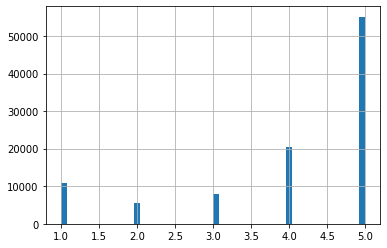

In [0]:
import matplotlib.pyplot as plt

edf['ratings'].hist(bins=50)
#most of the ratings are 5 star ratings given for the products

In [0]:
product_count=edf.groupby(by='productid',as_index=False)['ratings'].count()
sort_by_ratings1=product_count.sort_values('ratings',ascending=False)

In [0]:
sort_by_ratings1

,productid,ratings
5129,B00004ZCJE,2547
2110,B00001P4ZH,2075
3267,B00004T8R2,1692
2247,B00001WRSJ,1586
309,972683275,1051
...,...,...
1013,9985690311,1
5050,B00004ZAUA,1
1012,9985690141,1
1011,9985686810,1


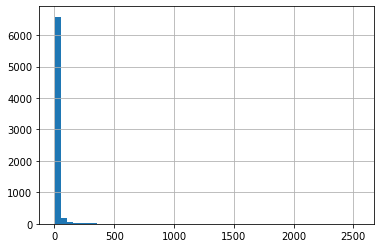

In [0]:
sort_by_ratings1['ratings'].hist(bins=50)

In [0]:
edf.describe()

,ratings
count,99999.000000
mean,4.033070
std,1.355018
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [0]:
edf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 3 columns):
userid       99999 non-null object
productid    99999 non-null object
ratings      99999 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.3+ MB


In [0]:
#i am just working on 1 lakh records so when i choosse users who rated atleast 50 times, i get only 2 users 
#so i am choosing users who rated atleast 5 times
rate_count=edf.groupby(by='userid',as_index=False)['ratings'].count()
sort_by_ratings=rate_count.sort_values('ratings',ascending=False)
edf_filtered=sort_by_ratings[sort_by_ratings['ratings']>=5]
edf_filtered.head()

,userid,ratings
26012,A231WM2Z2JL0U3,103
31437,A2BGZ52M908MJY,50
88776,AY8Q1X7G96HV5,37
15042,A1MJMYLRTZ76ZX,34
71462,A7Y6AVS576M03,30


In [0]:
edf_filtered.shape

(407, 2)

In [0]:
edf_new=pd.merge(edf,edf_filtered,on='userid',how='inner')

In [0]:
edf_new

,userid,productid,ratings_x,ratings_y
0,A3TAS1AG6FMBQW,972683275,5,5
1,A3TAS1AG6FMBQW,B00000K0JC,5,5
2,A3TAS1AG6FMBQW,B00000K13A,5,5
3,A3TAS1AG6FMBQW,B00002EQC2,5,5
4,A3TAS1AG6FMBQW,B00002EQCW,5,5
...,...,...,...,...
3282,A1VRG6CDWE7VJT,B0000511X0,5,6
3283,A1VRG6CDWE7VJT,B0000512LA,5,6
3284,A1VRG6CDWE7VJT,B0000513GY,5,6
3285,A1VRG6CDWE7VJT,B0000513O4,5,6


In [0]:
edf_new.drop(['ratings_y'],axis=1,inplace=True)

In [0]:
edf_new

,userid,productid,ratings_x
0,A3TAS1AG6FMBQW,972683275,5
1,A3TAS1AG6FMBQW,B00000K0JC,5
2,A3TAS1AG6FMBQW,B00000K13A,5
3,A3TAS1AG6FMBQW,B00002EQC2,5
4,A3TAS1AG6FMBQW,B00002EQCW,5
...,...,...,...
3282,A1VRG6CDWE7VJT,B0000511X0,5
3283,A1VRG6CDWE7VJT,B0000512LA,5
3284,A1VRG6CDWE7VJT,B0000513GY,5
3285,A1VRG6CDWE7VJT,B0000513O4,5


In [0]:
#popularity based recommendation model
edf_new.groupby('productid')['ratings_x'].mean().sort_values(ascending=False).head()

productid
B00005K47X    5.0
B00004TKL7    5.0
B00005JTW1    5.0
B00004TWM3    5.0
B00004TVQQ    5.0
Name: ratings_x, dtype: float64

In [0]:
#products which has got more number of ratingss
edf_new.groupby('productid')['ratings_x'].count().sort_values(ascending=False).head()

productid
B00004SB92    52
B000031KIM    24
B00004RC2D    23
B00004S9AK    22
B00005ARK3    21
Name: ratings_x, dtype: int64

In [0]:
product_mean_count=pd.DataFrame(edf_new.groupby('productid')['ratings_x'].mean())

In [0]:
product_mean_count['ratings_count']=pd.DataFrame(edf_new.groupby('productid')['ratings_x'].count())

In [0]:
product_mean_count.head(10)

,ratings_x,ratings_count
productid,,
1400501466,5.000000,1
1400501520,5.000000,1
1400501776,5.000000,1
1400532655,1.000000,1
140053271X,3.666667,3
1400532736,1.000000,1
1400599997,2.500000,2
1400698987,4.000000,1
9043413585,3.000000,1


In [0]:
#collaborative filtering model
from ipython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [0]:
!pip install surprise

     |████████████████████████████████| 6.5MB 4.2MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.0-cp36-cp36m-linux_x86_64.whl size=1678226 sha256=79d143ee6ffcf16a0360411b89caf82290dc4090d9739acd313093f753f9e6d9
  Stored in directory: /root/.cache/pip/wheels/cc/fa/8c/16c93fccce688ae1bde7d979ff102f7bee980d9cfeb8641bcf
Successfully built scikit-surprise


In [0]:
from surprise import Dataset,Reader
reader=Reader(rating_scale=(1,5))

In [0]:
data = Dataset.load_from_df(edf_new[['userid','productid','ratings_x']],reader,)

In [0]:
data  

In [0]:
#split data to train and test
from surprise.model_selection import train_test_split
trainset,testset=train_test_split(data,test_size=.30,random_state=123)

In [0]:
trainset

In [0]:
#user item rating data can be obtained as follows
user_records=trainset.ur

In [0]:
type(user_records)

collections.defaultdict

In [0]:
user_records[0]

[(0, 4.0), (137, 5.0), (859, 4.0), (955, 4.0), (811, 4.0), (50, 5.0)]

In [0]:
from surprise import KNNWithMeans
from surprise import accuracy

In [0]:
algo=KNNWithMeans(k=50,sim_options={'name':'pearson','user_based':False})

In [0]:
algo.fit(trainset)

Computing the pearson similarity matrix...
Done computing similarity matrix.


In [0]:
sim_products=algo.get_neighbors(trainset.to_inner_iid("B00004S9AK"),20)
[trainset.to_raw_iid(x) for x in sim_products]

['B00004VWM3',
 'B00003CWCI',
 'B00003006R',
 'B000058E2B',
 'B00004TX6I',
 'B00001W0H1',
 'B00004WHF4',
 'B00000JI2C',
 'B00004VUMI',
 'B00005AW1T',
 'B000050AQ7',
 'B00004ZC8Y',
 'B00004SY4H',
 'B00004WZPY',
 'B00000J4FS',
 'B000050464',
 'B00001XDXV',
 'B00005A0QZ',
 'B00005ARK3',
 'B00004Y7TD']

In [0]:
len(testset)

987

In [0]:
testset[0:5]

[('A2OBHC9ED59WO1', 'B00004TDN4', 5.0),
 ('A2SPHWZWS6HGPJ', 'B000058E2B', 4.0),
 ('A24AVNMSKC55D4', 'B00005854B', 5.0),
 ('A16X61RLY1YJL7', 'B00001W0DD', 5.0),
 ('AT4AV7XIQDKQP', 'B00003006R', 5.0)]

In [0]:
#evaluate on test set
test_pred=algo.test(testset)

In [0]:
accuracy.rmse(test_pred)

RMSE: 1.1388


1.1388494146471124

In [0]:
test_pred[12]

Prediction(uid='ALUNVOQRXOZIA', iid='B00004SA32', r_ui=5.0, est=4.235652173913043, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'})

In [0]:
#convert results to dataframe
test_pred_df=pd.DataFrame(test_pred)

In [0]:
test_pred_df["was_impossible"]=[x["was_impossible"] for x in test_pred_df["details"]]

In [0]:
test_pred_df.loc[test_pred_df.was_impossible].head(5)

,uid,iid,r_ui,est,details,was_impossible
7,A3BFT94R5SI5PU,B00005J7WD,2.0,4.235652,"{'was_impossible': True, 'reason': 'User and/o...",True
8,A3KYYFT538CZ0O,B00004Z76W,4.0,4.235652,"{'was_impossible': True, 'reason': 'User and/o...",True
9,AX04HWP70EXLD,B00004ZDCN,4.0,4.235652,"{'was_impossible': True, 'reason': 'User and/o...",True
12,ALUNVOQRXOZIA,B00004SA32,5.0,4.235652,"{'was_impossible': True, 'reason': 'User and/o...",True
16,AN30G4IKL1BMZ,B00005141F,4.0,4.235652,"{'was_impossible': True, 'reason': 'User and/o...",True


In [0]:
testset_new=trainset.build_anti_testset()

In [0]:
len(testset_new)

539824

In [0]:
testset_new[0:5]

[('APXV4GM2BKZX1', 'B00004TX6I', 4.235652173913043),
 ('APXV4GM2BKZX1', 'B00001W0H1', 4.235652173913043),
 ('APXV4GM2BKZX1', 'B00004WHF4', 4.235652173913043),
 ('APXV4GM2BKZX1', 'B00000JI2C', 4.235652173913043),
 ('APXV4GM2BKZX1', 'B00004VUMI', 4.235652173913043)]

In [0]:
predictions=algo.test(testset_new[0:100000])

In [0]:

predictions_df = pd.DataFrame([[x.uid,x.est] for x in predictions])

In [0]:
predictions_df.columns =["userId","est_rating"]
predictions_df.sort_values(by=["userId","est_rating"],ascending=False,inplace=True)

In [0]:
predictions_df.head()

,userId,est_rating
67461,AZ515FFZ7I2P7,5.0
67465,AZ515FFZ7I2P7,5.0
67466,AZ515FFZ7I2P7,5.0
67468,AZ515FFZ7I2P7,5.0
67470,AZ515FFZ7I2P7,5.0


In [0]:
top_10_recos=predictions_df.groupby("userId").head(10).reset_index(drop=True)

In [0]:
top_10_recos

,userId,est_rating
0,AZ515FFZ7I2P7,5.0
1,AZ515FFZ7I2P7,5.0
2,AZ515FFZ7I2P7,5.0
3,AZ515FFZ7I2P7,5.0
4,AZ515FFZ7I2P7,5.0
...,...,...
755,A10DIDVYDN2Q5Z,5.0
756,A10DIDVYDN2Q5Z,5.0
757,A10DIDVYDN2Q5Z,5.0
758,A10DIDVYDN2Q5Z,5.0
